<h1><center> Anthony Ballestas Homework 3 </center></h1> 
<h2><center> Sept. 17, 2020 </center></h2> 


In [7]:
#Anthony Ballestas 
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn import preprocessing
import matplotlib.pyplot as plt
from itertools import chain 
import warnings
warnings.simplefilter("ignore")

In [8]:
######################### Gisette load data #####################

root = r'C:\Users\antob\OneDrive - Broward College\_FSU_\6 - Fall 2020\Applied Machine Leanring\HW 3\Dataset' 
x_train = pd.read_csv(root + '\gisette_train.data', header=None, sep = " " )
y_train = pd.read_csv(root + '\gisette_train.labels', header=None, sep = " ")
x_test = pd.read_csv(root + '\gisette_valid.data', header=None, sep = " ")
y_test = pd.read_csv(root + '\gisette_valid.labels', header=None, sep = " ")

KeyboardInterrupt: 

In [ ]:
#normalize Gissette X data
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

#The data was an array before but I wanted to change it back into a df
x_train = pd.DataFrame(x_train)
x_train = x_train.iloc[:, 0:5000]

x_test = pd.DataFrame(x_test)
x_test = x_test.iloc[:, 0:5000]


y_test = np.ravel(y_test)

In [ ]:
#### Training Neg Log Likelyhood ####
iteration_num = 1

iteration_list = []
train_neg_log_list = []
error_list = []


for i in range (300):
    clf = LogisticRegression(max_iter = iteration_num)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict_proba(x_train)
    neg_log_likelyhood = log_loss(y_train, y_train_pred)
    misclass_error = 1 - clf.score(x_train, y_train)

    error_list.append(misclass_error)
    iteration_list.append(iteration_num)
    train_neg_log_list.append(neg_log_likelyhood)
    iteration_num += 1

In [ ]:
#### Testing Neg Log Likelyhood ####
test_iteration_num = 1
test_neg_log_list = []
test_iteration_list = []
test_error_list = []

for i in range(300):
    clf = LogisticRegression(max_iter=test_iteration_num)
    clf.fit(x_train, y_train)
    y_test_pred = clf.predict_proba(x_test)
    test_neg_log_likelyhood = log_loss(y_test, y_test_pred)
    test_misclass_error = 1 - clf.score(x_test, y_test)
    
    
    test_error_list.append(test_misclass_error)
    test_iteration_list.append(test_iteration_num)
    test_neg_log_list.append(test_neg_log_likelyhood)
    test_iteration_num += 1


# Gisette Dataset (Problem A)

    
<font size="4">     
    Below is the plot for the negative log-likelihood vs iteration number and a table with the misclassification error for the training and test set of the Gisette dataset. Only some of the data will show on the Jupyter notebook however I can turn in the CSV file if ask.</font>
    
   <font size="4">  We can se a sharp drop in the negative log likelyhood after around the tenth iteration.
</font>

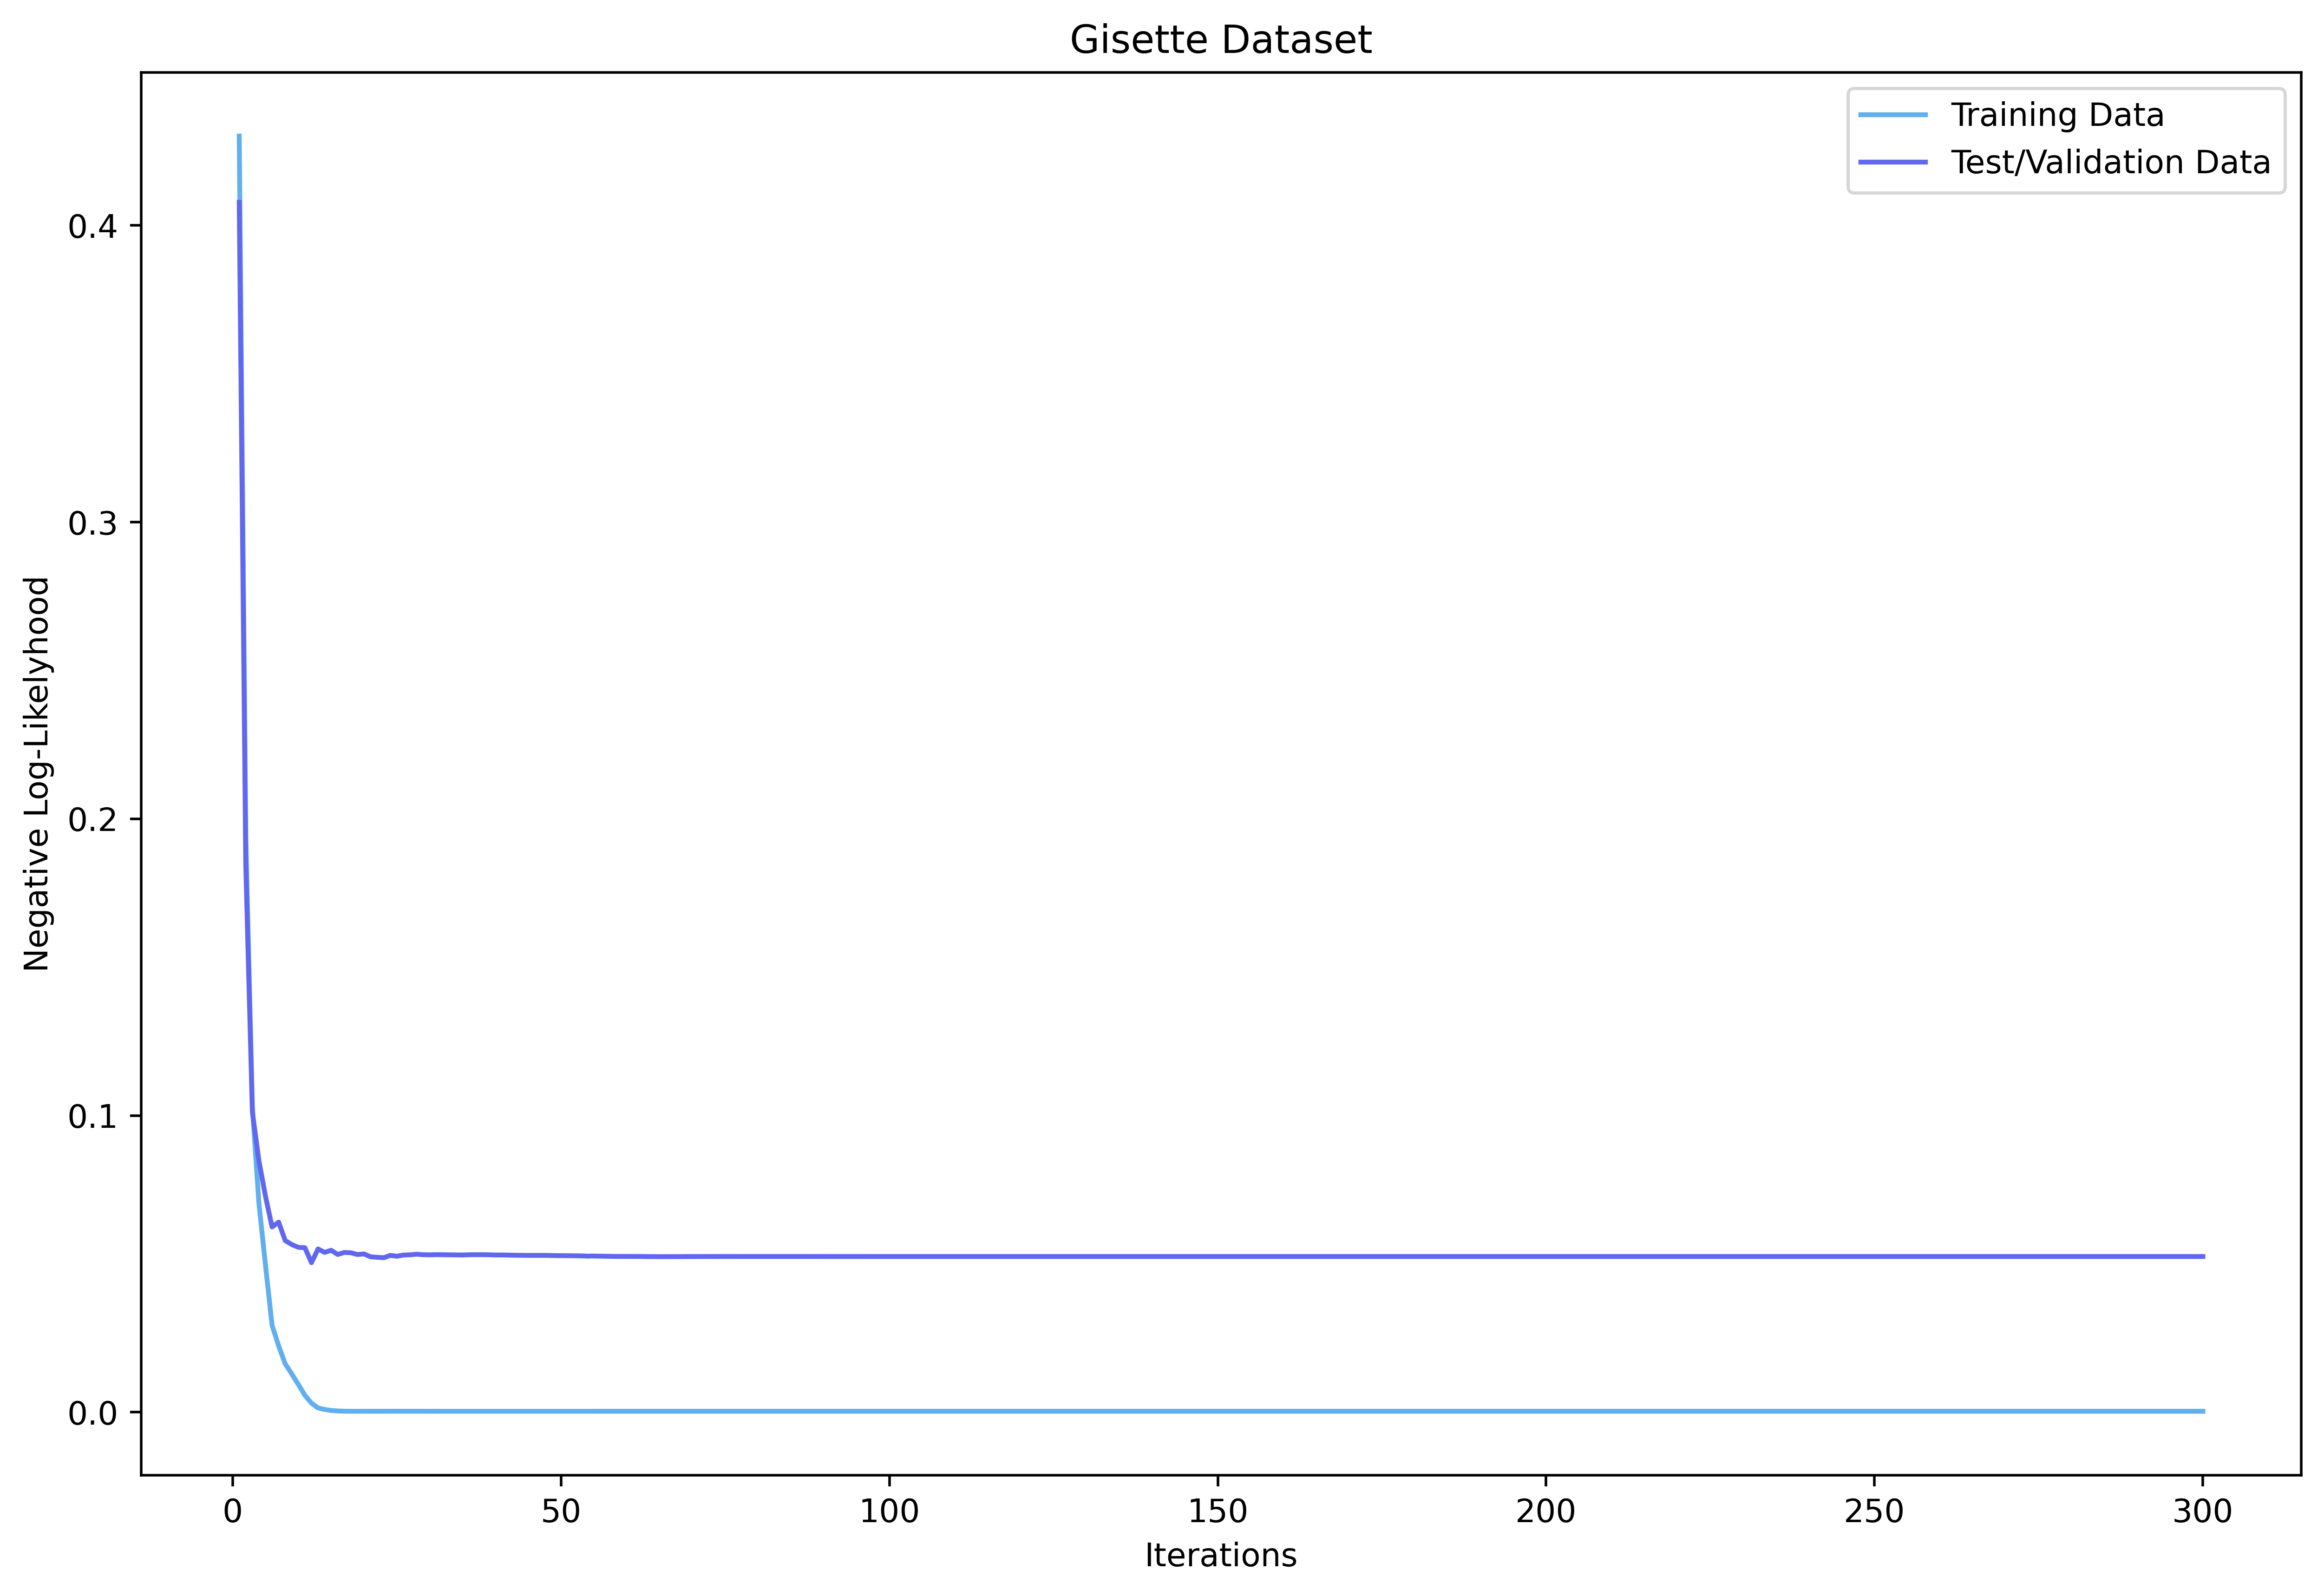

<Figure size 432x288 with 0 Axes>

In [234]:
fig = plt.figure(figsize = (12,8), dpi = 500)
plt.plot(iteration_list,train_neg_log_list, label = "Training Data", color = "#61AFEF")
plt.plot(iteration_list, test_neg_log_list, label = "Test/Validation Data", color = "#6168EF")
plt.xlabel("Iterations")
plt.ylabel("Negative Log-Likelyhood")
plt.legend()
plt.title("Gisette Dataset")
plt.show()
plt.savefig("Gisette_Neg_log_vs_iters.png", pdi = 1200)

In [76]:
gisette_train_error_table = pd.DataFrame(data = error_list)
gisette_train_error_table

,0
0,0.118667
1,0.059667
2,0.032167
3,0.021000
4,0.011000
...,...
295,0.000000
296,0.000000
297,0.000000
298,0.000000


In [75]:
gisette_test_error_table = pd.DataFrame(data = test_error_list)
gisette_test_error_table

,0
0,0.118667
1,0.059667
2,0.032167
3,0.021000
4,0.011000
...,...
295,0.000000
296,0.000000
297,0.000000
298,0.000000


In [198]:
def homeworkassignment(xtrain, ytrain, xtest, ytest):
    
    
    train_ln_likelyhood_list = []
    train_error_list=[] 
    test_ln_likelyhood_list=[]
    test_error_def_list=[]
    iterlist=[]
    #You'll need 5 vars to get all the things from this function

    iteration_num = 1

    for i in range(300):
            #train model on training data
            clf = LogisticRegression(max_iter=iteration_num)
            clf.fit(xtrain, ytrain)

            #get log likelyhood and error rate for training data
            train_y_pred_prob = clf.predict_proba(xtrain)

            train_neg_ln_likelyhood = log_loss(ytrain, train_y_pred_prob)
            train_misclass_error = 1 - clf.score(xtrain, ytrain)

            #append train info into lists
            train_ln_likelyhood_list.append(train_neg_ln_likelyhood)
            train_error_list.append(train_misclass_error)

    #################################################################################        

            #get log likelyhood and error rate for the test data
            test_y_pred_prob = clf.predict_proba(xtest)

            test_neg_log = log_loss(ytest, test_y_pred_prob)
            test_error = 1 - clf.score(xtest, ytest)

            test_ln_likelyhood_list.append(test_neg_log)
            test_error_def_list.append(test_error)


            iterlist.append(iteration_num)
            iteration_num += 1

    return {'train_ln_likelyhood_list':train_ln_likelyhood_list, 
            'test_ln_likelyhood_list':test_ln_likelyhood_list,
            'train_error_list':train_error_list,             
            'test_error_def_list':test_error_def_list, 
            'iterlist':iterlist}

In [230]:
def graph_n_table (title, filename, train_ln_likelyhood_list ,test_ln_likelyhood_list, train_error_list, test_error_def_list, iterlist):
   
    
    fig=plt.figure(figsize=(12,8), dpi = 500)
    plt.plot(iterlist, train_ln_likelyhood_list, label = "Training Data", color = "#61AFEF")
    plt.plot(iterlist, test_ln_likelyhood_list, label = "Test/Validation Data", color = "#6168EF")
    plt.xlabel("Iterations")
    plt.ylabel("Negative Log-Likelyhood")
    plt.legend()
    plt.title(title)
    plt.show()
    plt.savefig(str(filename), pdi = 1200)
    
    train_error_name = pd.DataFrame(data = train_error_list)
    test_error_name = pd.DataFrame(data = test_error_def_list)
    
    return {'train_error_name':train_error_name, 'test_error_name':test_error_name}

In [201]:
######### Hill valley ###############
x_hill_train = pd.read_csv(r'C:\Users\antob\OneDrive - Broward College\_FSU_\6 - Fall 2020\Applied Machine Leanring\HW 3\Dataset\hill-vally\X.dat', header=None, sep = " " )
y_hill_train = pd.read_csv(r'C:\Users\antob\OneDrive - Broward College\_FSU_\6 - Fall 2020\Applied Machine Leanring\HW 3\Dataset\hill-vally\Y.dat', header=None, sep = " " )

x_hill_test = pd.read_csv(r'C:\Users\antob\OneDrive - Broward College\_FSU_\6 - Fall 2020\Applied Machine Leanring\HW 3\Dataset\hill-vally\Xtest.dat', header=None, sep = " " )
y_hill_test = pd.read_csv(r'C:\Users\antob\OneDrive - Broward College\_FSU_\6 - Fall 2020\Applied Machine Leanring\HW 3\Dataset\hill-vally\Ytest.dat', header=None, sep = " " )

In [202]:
##### normalize Hill-vally X data #######
x_hill_train = preprocessing.scale(x_hill_train)
x_hill_test = preprocessing.scale(x_hill_test)

##### convert back to df ####
x_hill_train = pd.DataFrame(x_hill_train)
x_hill_train = x_hill_train


x_hill_test = pd.DataFrame(x_hill_test)
x_hill_test = x_hill_test



In [203]:
hill_valley_output = homeworkassignment(x_hill_train, y_hill_train, x_hill_test, y_hill_test)

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

C:\Users\antob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

# Hill Valley Dataset (Problem 1 - B)

<font size ="5"> 
In this dataset we see that, much like the last dataset, there is a sharp drop in the negative log likelyhood after roughly the tenth iteration.
</font>

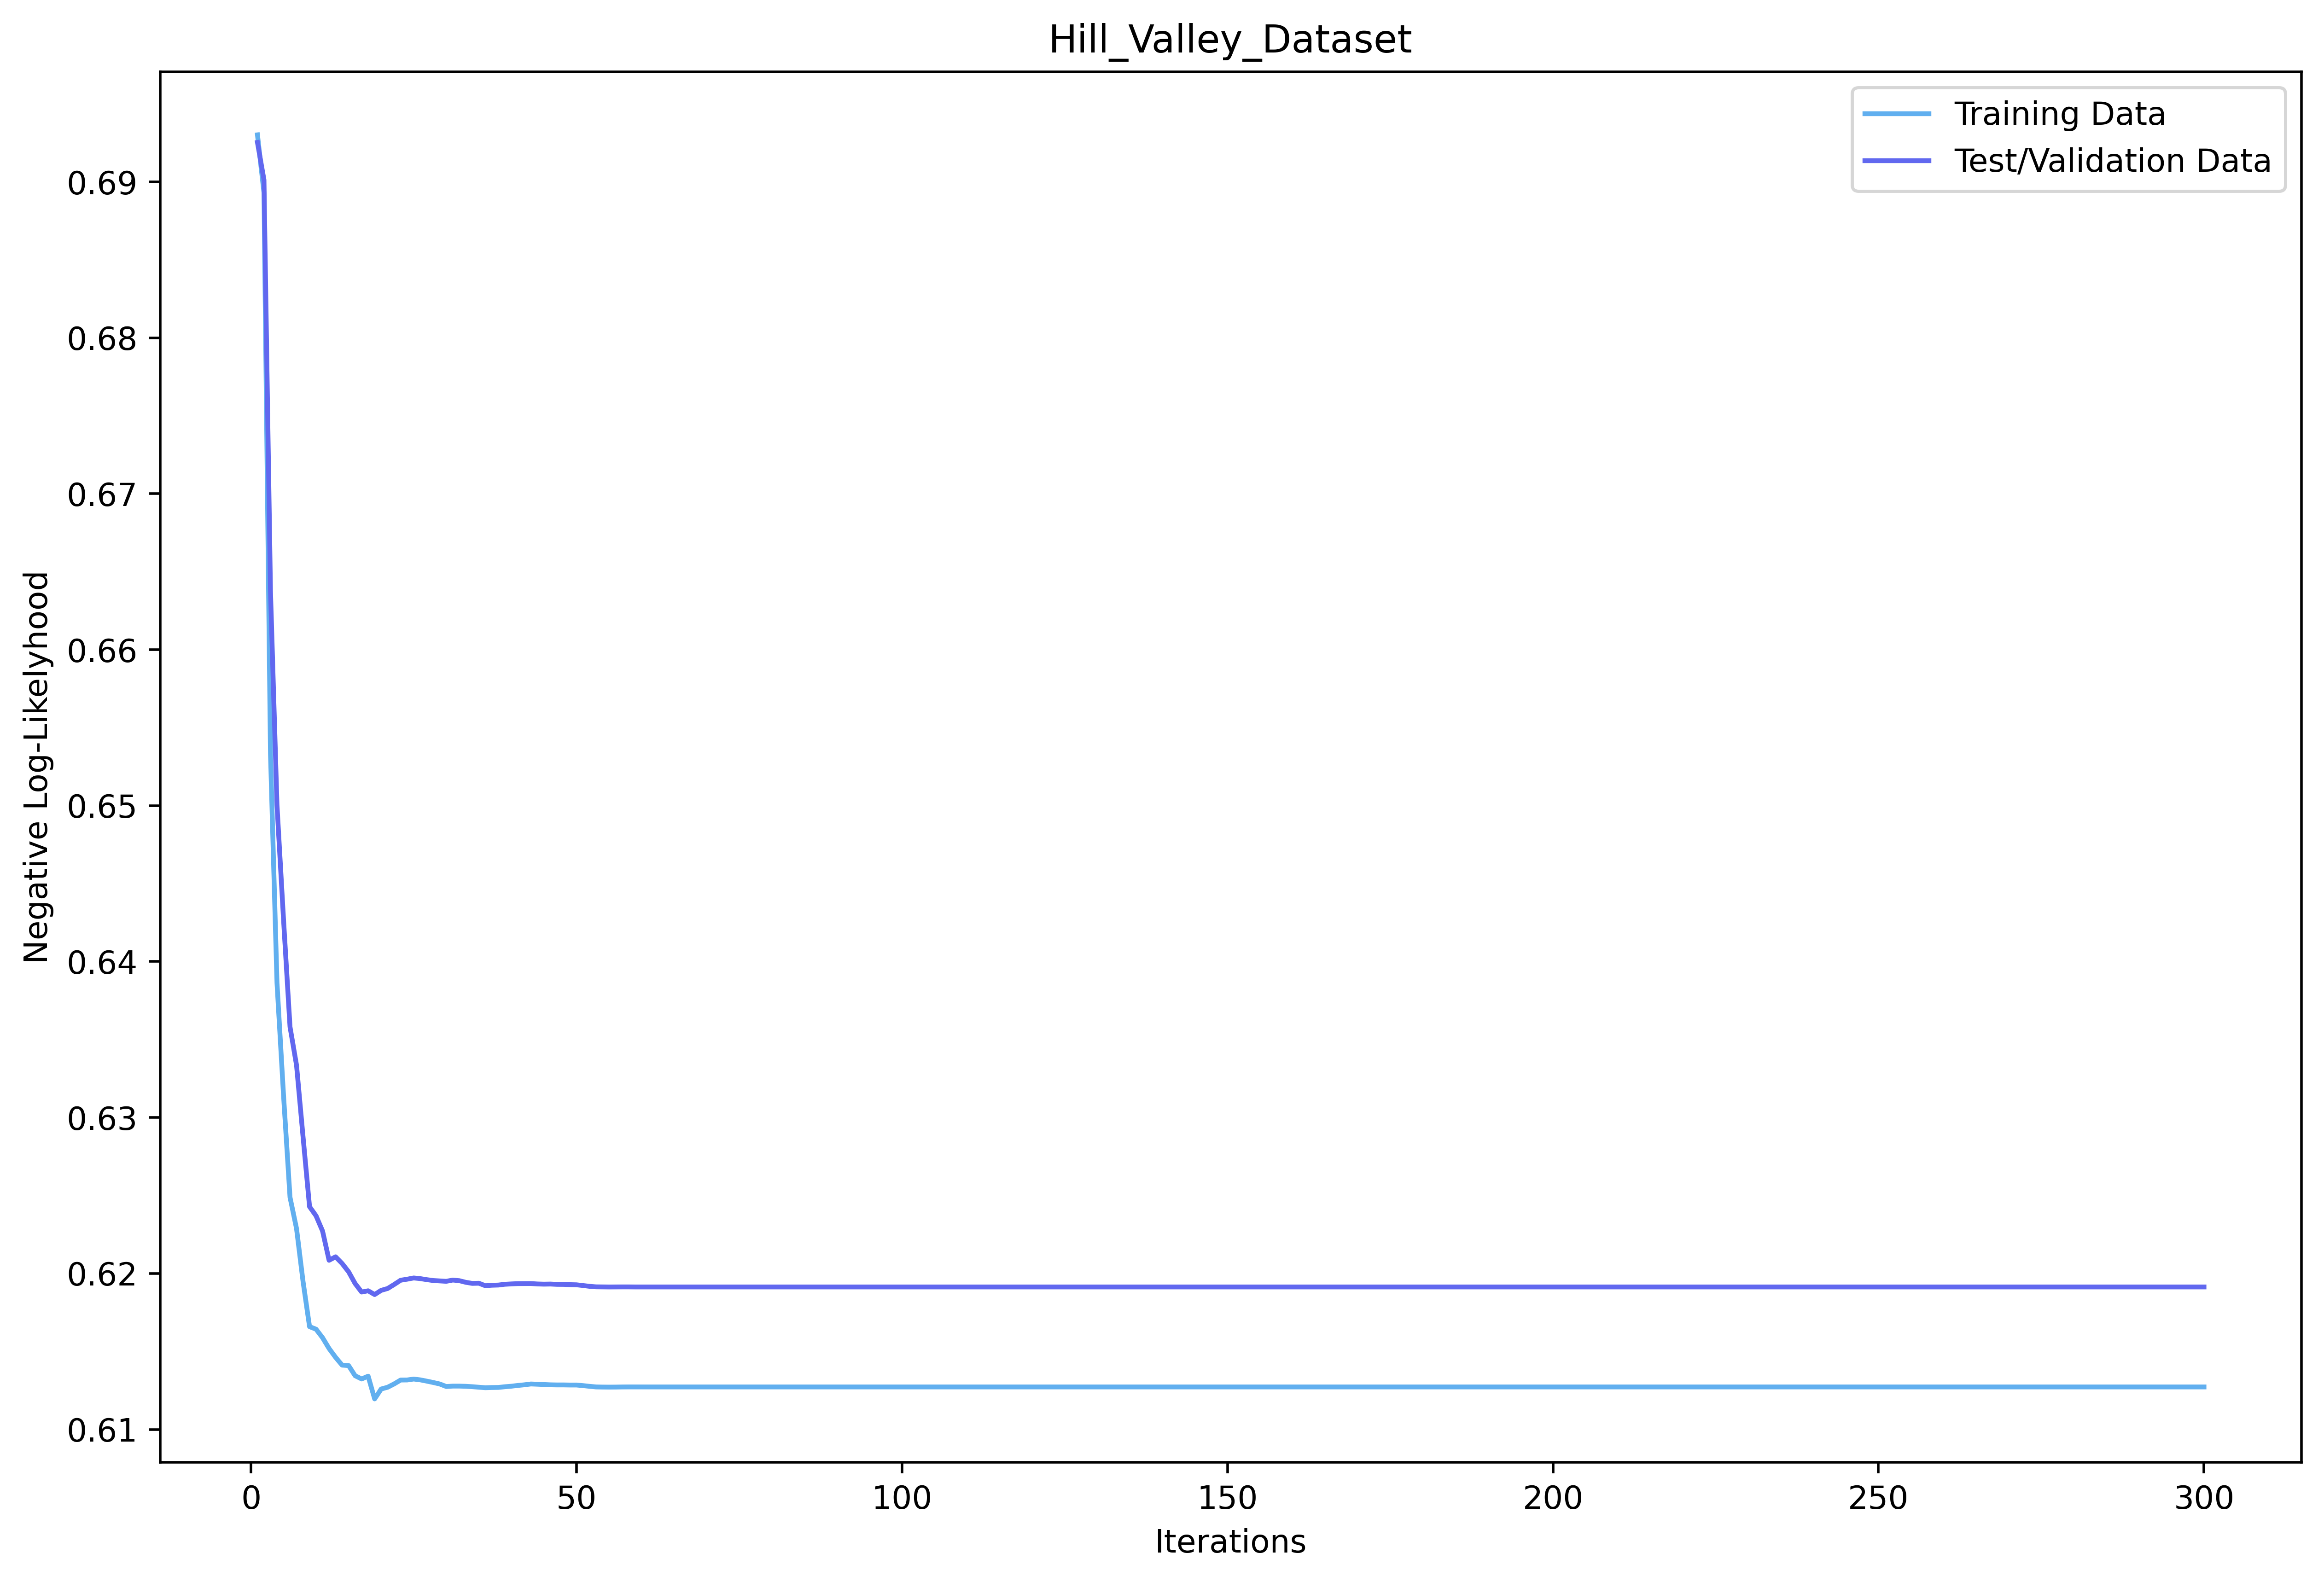

<Figure size 432x288 with 0 Axes>

In [232]:
hill_valley_tables = graph_n_table("Hill_Valley_Dataset", "Hill_Valley_Graph", **hill_valley_output ) 

In [206]:
hill_valley_tables

{'train_error_name':             0
 0    0.483498
 1    0.447195
 2    0.356436
 3    0.412541
 4    0.394389
 ..        ...
 295  0.321782
 296  0.321782
 297  0.321782
 298  0.321782
 299  0.321782
 
 [300 rows x 1 columns],
 'test_error_name':             0
 0    0.496700
 1    0.453795
 2    0.366337
 3    0.437294
 4    0.415842
 ..        ...
 295  0.160066
 296  0.160066
 297  0.160066
 298  0.160066
 299  0.160066
 
 [300 rows x 1 columns]}

In [221]:
######## Dexter Dataset ############
x_dex_train = pd.read_csv(r'C:\Users\antob\OneDrive - Broward College\_FSU_\6 - Fall 2020\Applied Machine Leanring\HW 3\Dataset\Dexter\dexter_train.csv', header=None)
y_dex_train = pd.read_csv(r'C:\Users\antob\OneDrive - Broward College\_FSU_\6 - Fall 2020\Applied Machine Leanring\HW 3\Dataset\Dexter\dexter_train.labels', header=None, sep = " " )

x_dex_test = pd.read_csv(r'C:\Users\antob\OneDrive - Broward College\_FSU_\6 - Fall 2020\Applied Machine Leanring\HW 3\Dataset\Dexter\dexter_valid.csv', header=None)
y_dex_test = pd.read_csv(r'C:\Users\antob\OneDrive - Broward College\_FSU_\6 - Fall 2020\Applied Machine Leanring\HW 3\Dataset\Dexter\dexter_valid.labels', header=None, sep = " " )

In [225]:
dexter_output = homeworkassignment(x_dex_train, y_dex_train, x_dex_test, y_dex_test)

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antob\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

# Dexter Dataset (Problem 1 - C)

<font size= 4> This dataset seems to take longer before hitting that flatline like the others. It seems to behave after fifty iterations for the test data.</font>

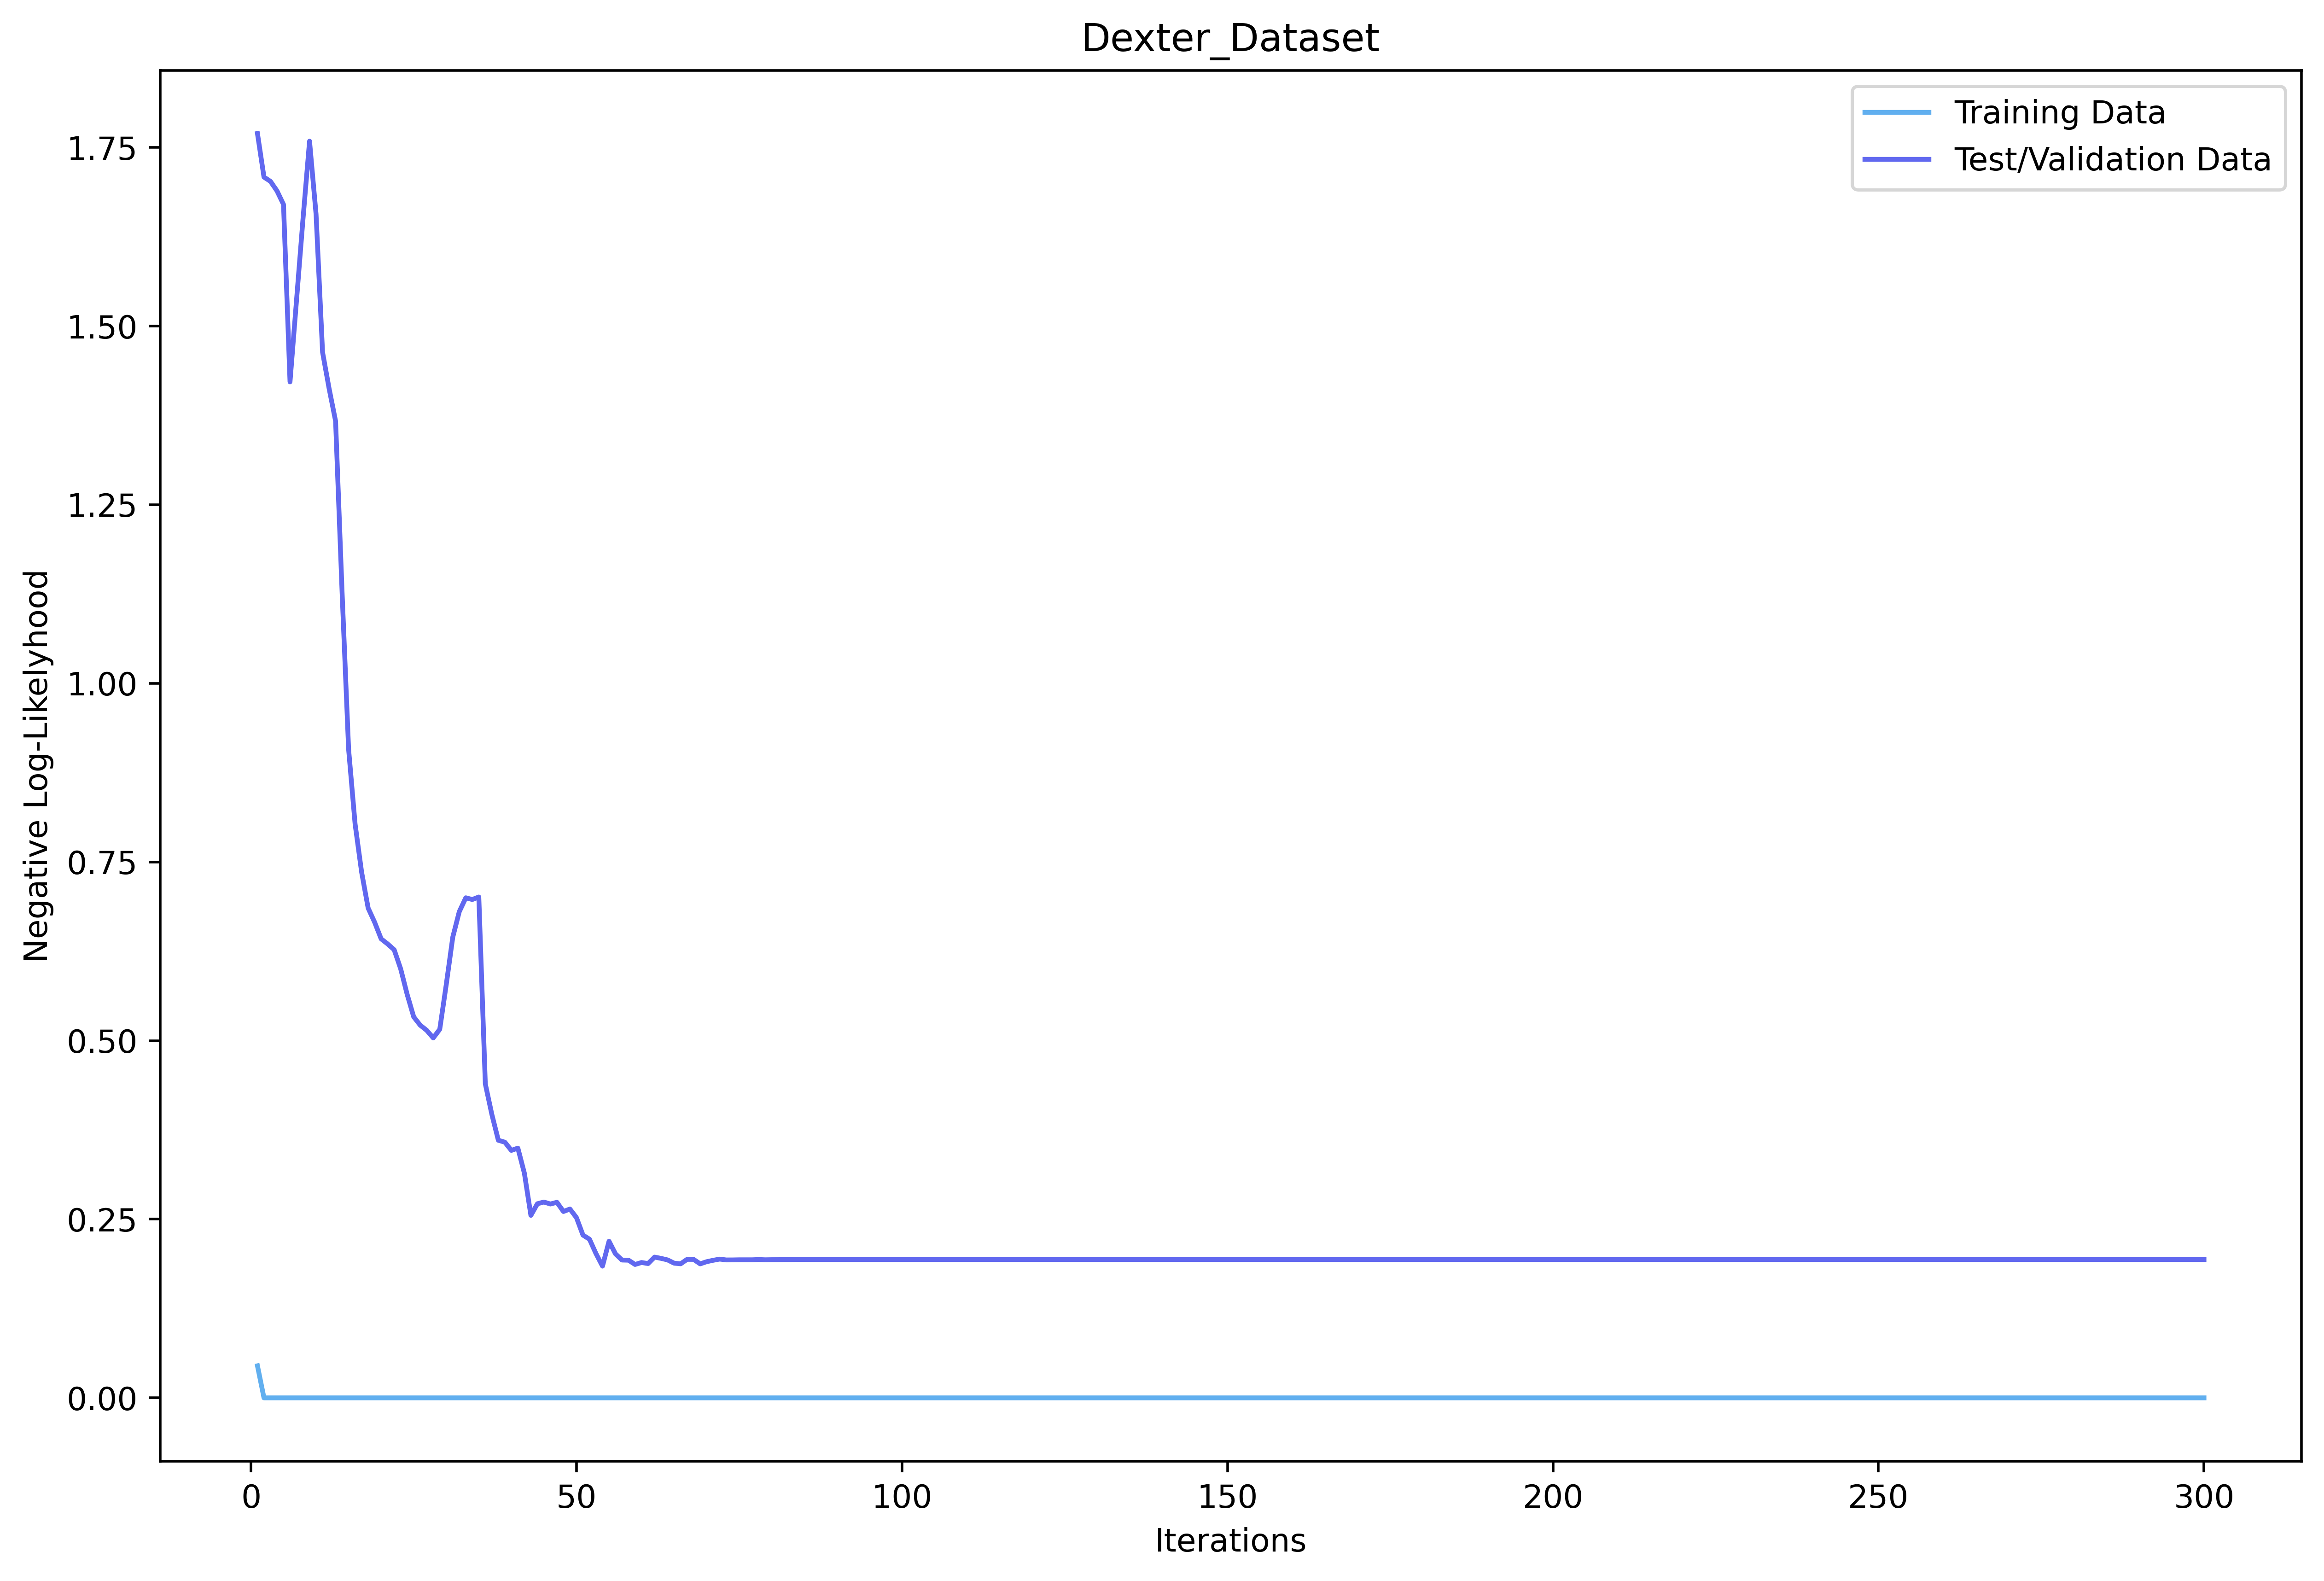

<Figure size 432x288 with 0 Axes>

In [231]:
dexter_tables = graph_n_table("Dexter_Dataset", "Dexter_Graph.png", **dexter_output)